<a href="https://colab.research.google.com/github/Tejas892001/Fresh-Rotten-Fruit-Classification/blob/main/Fresh_Rotten_Fruit_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Abstract:
Abstract :
This project aimed to develop a deep learning model for classifying fresh and rotten fruits using a dataset of 12,000 augmented images of bananas, apples, and oranges. The data was collected from Kaggle and preprocessed using the ImageDataGenerator from TensorFlow. The model architecture consisted of convolutional and dense layers, followed by a softmax activation for multi-class classification. The model was trained using the Adam optimizer and evaluated using accuracy as the performance metric. The results showed that the trained model achieved a high accuracy of 97.58% on the validation data.



# Dataset :
The dataset for this project was obtained from Kaggle
website and consisted of 2000 images of fresh and rotten
bananas, apples, and oranges. The dataset was augmented to
increase the diversity and quantity of the data. Augmentation
techniques, such as rotation by a certain angle and addition
of sandpaper noise, were applied to the original images,
resulting in a total of approximately 12000 images.

[Link to Dataset](https://www.kaggle.com/datasets/sriramr/fruits-fresh-and-rotten-for-classification)

In [1]:
! pip install kaggle

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
! mkdir ~/.kaggle

In [9]:
! cp kaggle.json ~/.kaggle/

In [10]:
! chmod 600 ~/.kaggle/kaggle.json

In [11]:
! kaggle datasets download sriramr/fruits-fresh-and-rotten-for-classification

100% 3.57G/3.58G [00:42<00:00, 116MB/s] 
100% 3.58G/3.58G [00:43<00:00, 89.2MB/s]


In [ ]:
! unzip fruits-fresh-and-rotten-for-classification.zip

In [57]:
import sklearn
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
%matplotlib inline
import tensorflow as tf
import keras
import glob
import cv2
import os
from tensorflow.keras import layers, models

In [68]:
fruit_images_train = []
labels_train = [] 
X_train = []
y_train = []
for fruit_dir_path in glob.glob("dataset/train/*"):
    fruit_label = fruit_dir_path.split("/")[-1]
    for image_path in glob.glob(os.path.join(fruit_dir_path, "*.png")):
        image = cv2.imread(image_path, cv2.IMREAD_COLOR)
        image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR)
        image = cv2.resize(image, (32, 32))
        fruit_images_train.append(image)
        if fruit_label == 'freshapples':
          labels_train.append(0)
        elif fruit_label == 'freshbanana':
          labels_train.append(1)
        elif fruit_label == 'freshoranges':
          labels_train.append(2)
        elif fruit_label == 'rottenapples':
          labels_train.append(3)
        elif fruit_label == 'rottenbanana':
          labels_train.append(4)
        elif fruit_label == 'rottenoranges':
          labels_train.append(5)
        
X_train = np.array(fruit_images_train)
y_train = np.array(labels_train)

In [69]:
print(X_train.shape)
print(y_train.shape)
print(np.unique(y_train))

(10901, 32, 32, 3)
(10901,)
[0 1 2 3 4 5]


In [144]:
fruit_images_test1 = []
fruit_images_test = []
labels_test = [] 
X_test = []
y_test = []
for fruit_dir_path in glob.glob("dataset/test/*"):
    fruit_label = fruit_dir_path.split("/")[-1]
    for image_path in glob.glob(os.path.join(fruit_dir_path, "*.png")):
        image = cv2.imread(image_path, cv2.IMREAD_COLOR)
        image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR)
        fruit_images_test1.append(image)
        image = cv2.resize(image, (32, 32))
        fruit_images_test.append(image)
        if fruit_label == 'freshapples':
          labels_test.append(0)
        elif fruit_label == 'freshbanana':
          labels_test.append(1)
        elif fruit_label == 'freshoranges':
          labels_test.append(2)
        elif fruit_label == 'rottenapples':
          labels_test.append(3)
        elif fruit_label == 'rottenbanana':
          labels_test.append(4)
        elif fruit_label == 'rottenoranges':
          labels_test.append(5)
        
X_test = np.array(fruit_images_test)
y_test = np.array(labels_test)

X_test1 = np.array(fruit_images_test1)

<ipython-input-144-15fec9c08800>:30: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X_test1 = np.array(fruit_images_test1)


In [145]:
print(X_test.shape)
print(y_test.shape)
print(np.unique(y_test))

(2698, 32, 32, 3)
(2698,)
[0 1 2 3 4 5]


In [72]:
X_train = X_train/255

In [138]:
from keras.engine.training import optimizer
#CNN
model1 = models.Sequential([
    layers.Conv2D(filters=32, kernel_size=(3,3), activation='relu', input_shape=(32,32,3)),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(filters=64,kernel_size=(3,3),activation='relu'),
    layers.MaxPooling2D((2,2)),
    #This is dense layer
    layers.Flatten(),
    layers.Dense(128,activation='relu'),
    layers.Dense(88,activation='relu'),
    layers.Dense(6,activation='softmax')
    #In case of softmax sum of all output values will be equal to 1.
])

model1.compile(optimizer='adam',
               loss='sparse_categorical_crossentropy',
               metrics=['accuracy']
               )

model = model1.fit(X_train,y_train,epochs=20)


Epoch 1/20
341/341 [==============================] - 18s 47ms/step - loss: 0.6504 - accuracy: 0.7594
Epoch 2/20
341/341 [==============================] - 25s 74ms/step - loss: 0.3061 - accuracy: 0.8911
Epoch 3/20
341/341 [==============================] - 16s 48ms/step - loss: 0.2142 - accuracy: 0.9240
Epoch 4/20
341/341 [==============================] - 16s 46ms/step - loss: 0.1716 - accuracy: 0.9367
Epoch 5/20
341/341 [==============================] - 17s 50ms/step - loss: 0.1388 - accuracy: 0.9476
Epoch 6/20
341/341 [==============================] - 16s 46ms/step - loss: 0.1103 - accuracy: 0.9595
Epoch 7/20
341/341 [==============================] - 16s 47ms/step - loss: 0.0761 - accuracy: 0.9720
Epoch 8/20
341/341 [==============================] - 17s 50ms/step - loss: 0.0887 - accuracy: 0.9691
Epoch 9/20
341/341 [==============================] - 18s 53ms/step - loss: 0.0724 - accuracy: 0.9769
Epoch 10/20
341/341 [==============================] - 16s 47ms/step - loss: 0.048

In [139]:
model1.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_8 (Conv2D)           (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d_8 (MaxPooling  (None, 15, 15, 32)       0         
 2D)                                                             
                                                                 
 conv2d_9 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_9 (MaxPooling  (None, 6, 6, 64)         0         
 2D)                                                             
                                                                 
 flatten_4 (Flatten)         (None, 2304)              0         
                                                                 
 dense_12 (Dense)            (None, 128)              

In [146]:
X_test = X_test/255
model1.evaluate(X_test,y_test)

85/85 [==============================] - 1s 12ms/step - loss: 0.1500 - accuracy: 0.9596


[0.15002189576625824, 0.9595996737480164]

In [147]:
y_pred = model1.predict(X_test)

85/85 [==============================] - 1s 13ms/step


In [148]:
y_classes = [np.argmax(element) for element in y_pred]
y_classes[:5]

[1, 1, 1, 1, 1]

In [149]:
fruits = ['freshapples','freshbanan','freshoranges','rottenapples','rottenbanana','rottenoranges']

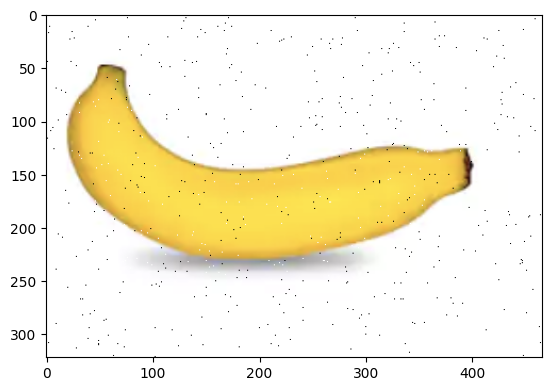

In [150]:
plt.imshow(X_test1[0])

In [151]:
fruits[y_classes[0]]

'freshbanan'

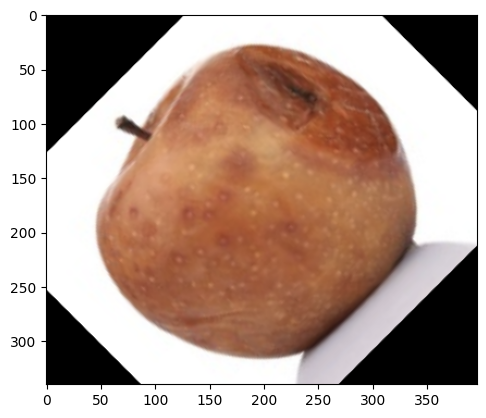

In [152]:
plt.imshow(X_test1[2500])

In [153]:
fruits[y_classes[2500]]

'rottenapples'

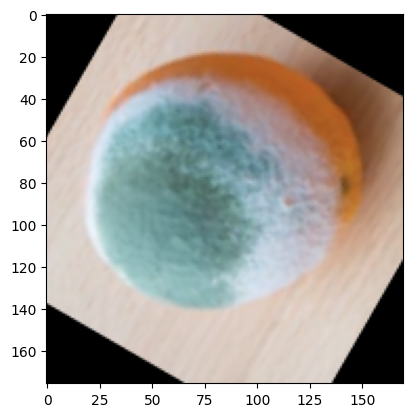

In [154]:
plt.imshow(X_test1[930])

In [155]:
fruits[y_classes[930]]

'rottenoranges'

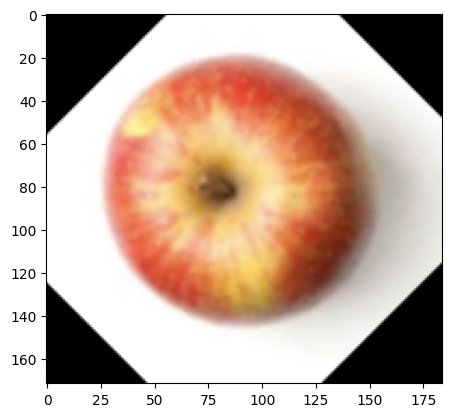

In [156]:
plt.imshow(X_test1[1438])

In [157]:
fruits[y_classes[1438]]

'freshapples'

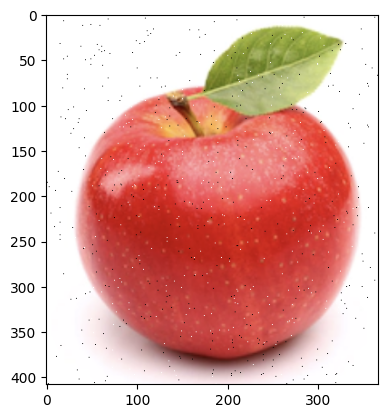

In [158]:
plt.imshow(X_test1[1650])

In [159]:
fruits[y_classes[1650]]

'freshapples'

In [160]:
cm = tf.math.confusion_matrix(labels=y_test,predictions=y_classes)
cm

<tf.Tensor: shape=(6, 6), dtype=int32, numpy=
array([[388,   0,   0,   7,   0,   0],
       [  1, 379,   0,   0,   1,   0],
       [  8,   1, 352,  18,   1,   8],
       [ 17,   0,   0, 581,   2,   1],
       [  0,   0,   0,   0, 529,   1],
       [  0,   1,   3,  35,   4, 360]], dtype=int32)>

Text(95.72222222222221, 0.5, 'Truth')

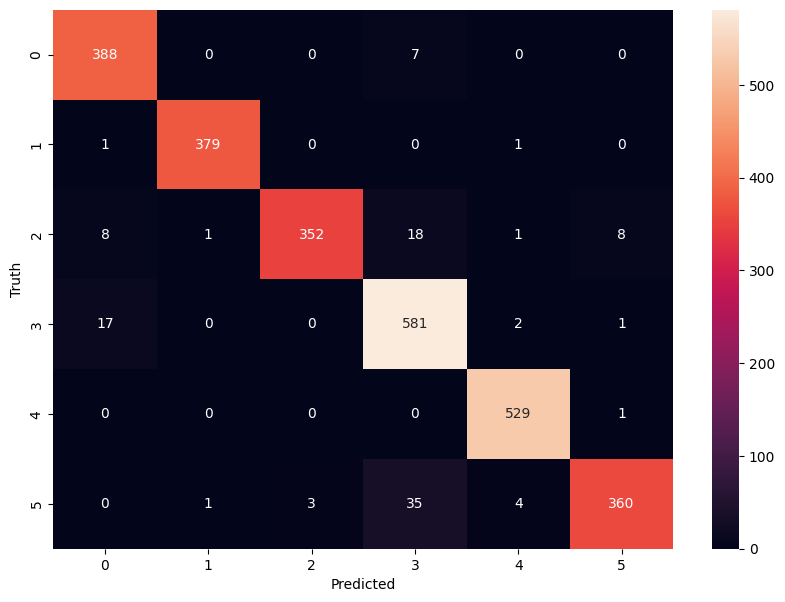

In [161]:
import seaborn as sn
plt.figure(figsize=(10,7))
sn.heatmap(cm,annot=True,fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

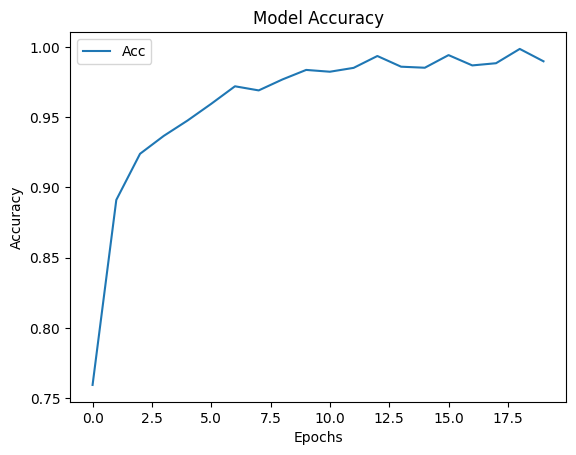

In [163]:
plt.plot(model.history['accuracy'])

plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(['Acc','Val'], loc = 'upper left')